In [1]:
conda install contextily --channel conda-forge -y

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /home/sg/miniconda3/envs/fire_ffp

  added / updated specs:
    - contextily


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    contextily-1.3.0           |     pyhd8ed1ab_0          19 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.3.0                |     pyhd8ed1ab_0          68 KB  conda-forge
    mercantile-1.2.1           |     pyhd8ed1ab_0          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         140 KB

The following NEW packages will be INSTALLED:

  contextily         conda-forge/noarch::contextily-1.3.0-pyhd8ed1ab_0 
  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0 
  geopy              conda-forg

In [14]:
conda install -c conda-forge folium -y


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\miniconda3\envs\per

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    folium-0.14.0              |     pyhd8ed1ab_0          71 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.6.0-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.14.0-pyhd8ed1ab_0




branca-0.6.0         | 27 KB     |            |   0% 
branca-0.6.0         | 27 KB     | #####8     |  59% 
branca-0.6.0         | 27 KB     | ########## | 



==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda




In [26]:
conda install -c conda-forge basemap-data-hires=1.0.8.dev0 -y

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\miniconda3\envs\per

  added / updated specs:
    - basemap-data-hires=1.0.8.dev0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.3.6              |  py310h580fdcf_0         309 KB  conda-forge
    basemap-data-1.3.2         |     pyhd8ed1ab_3        24.1 MB  conda-forge
    basemap-data-hires-1.0.8.dev0|                2       105.4 MB  conda-forge
    numpy-1.24.3               |  py310hd02465a_0         5.7 MB  conda-forge
    openssl-3.1.1              |       hcfcfb64_1         7.1 MB  conda-forge
    pyproj-3.3.1               |  py310h843b76b_1         406 KB  conda-forge
    pyshp-2.3.1                |     



==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda




In [22]:
conda install -c conda-forge matplotlib-scalebar -y

Solving environment: done

## Package Plan ##

  environment location: /home/sg/miniconda3/envs/fire_ffp

  added / updated specs:
    - matplotlib-scalebar


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-scalebar-0.8.1  |     pyhd8ed1ab_0          19 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          19 KB

The following NEW packages will be INSTALLED:

  matplotlib-scaleb~ conda-forge/noarch::matplotlib-scalebar-0.8.1-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge cartopy -y

Solving environment: done

## Package Plan ##

  environment location: /home/sg/miniconda3/envs/fire_ffp

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.21.1             |   py39h6e7ad6e_0         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  cartopy            conda-forge/linux-64::cartopy-0.21.1-py39h6e7ad6e_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c anaconda scikit-image -y

In [19]:
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx
#import folium
#from folium.plugins import Search
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
#from skimage.transform import resize
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Polygon
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [ ]:
oikismoi, label name

In [ ]:
bsm, label year

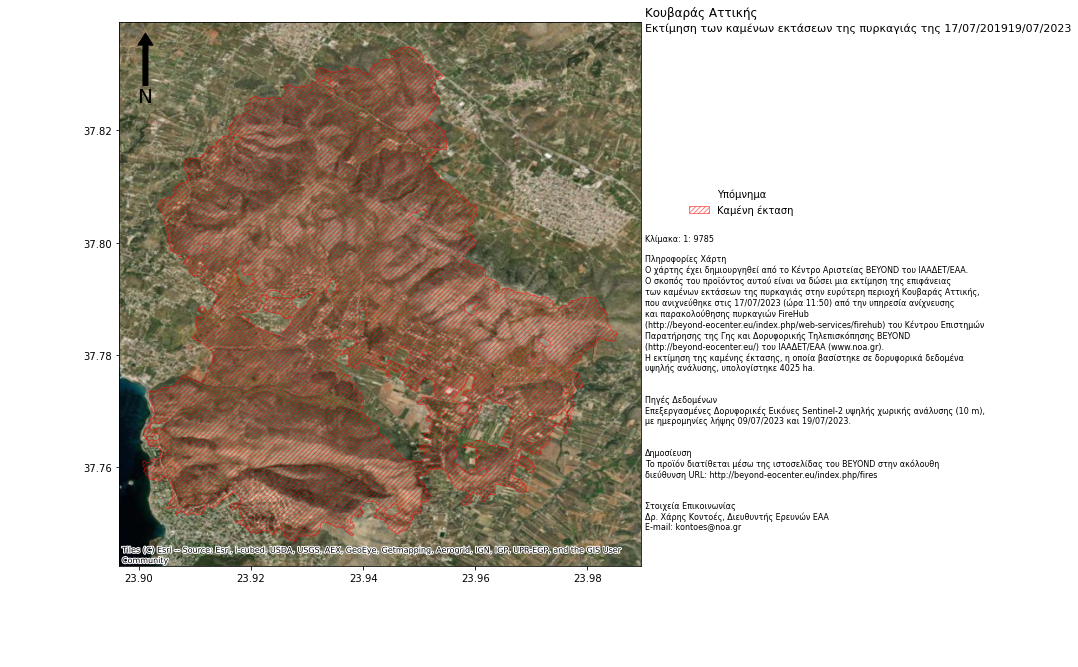

In [98]:
shapefile = gpd.read_file('/home/sg/Projects/fires2023/kalivia_37.80006_23.922329/manual_burned.shp')
shapefile.crs = 'EPSG:2100'
shapefile = shapefile.to_crs(epsg=4326) #reproject in WGS84
fig, ax = plt.subplots(figsize=(10,10)) 
shapefile.plot(ax=ax, edgecolor='red', facecolor='none', alpha=0.5, hatch='/////', legend=True) #edgecolor for the lines, facecolor for the filling, alpha for transparency, hatch for the ribbed effect

# Add the satellite basemap using contextily
ctx.add_basemap(ax, crs=shapefile.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Create scale bar
#ctx.add_scalebar(ax=ax, length=1, position='bottomleft', units='km')

# Get the extent of the data to calculate the scale
x_min, y_min, x_max, y_max = shapefile.total_bounds

# expansion_factor = 3
# x_min += width * expansion_factor
# x_max -= width * expansion_factor
# y_min += height * expansion_factor
# y_max -= height * expansion_factor
# aoi_polygon = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)])
# aoi_gdf = gpd.GeoDataFrame(geometry=[aoi_polygon], crs=shapefile.crs)


# Calculate the horizontal scale (in meters) based on the map extent
scale_x = (x_max - x_min) * 111000  # Approximate value for longitude in meters at the equator

# Calculate the vertical scale (in meters) based on the map extent
scale_y = (y_max - y_min) * 111000  # Approximate value for latitude in meters
# Determine the appropriate scale value based on the map extent
scale = max(scale_x, scale_y)
# Choose the units you want to display for the scale (e.g., meters or kilometers)
scale_units = "μέτρο"
# Add scale to the plot as text
scale_text = f"Κλίμακα: 1: {scale:.0f}"

# Add logo
#logo = plt.imread('C:\\Users\\User\\Documents\\Projects_2022\\FireHub_FireMapping_Summer\\FB TIMELINE 1200X675.jpg')
#ax.imshow(logo, extent=(0.8, 1, 0.8, 1), transform=ax.transAxes)
#small_logo = resize(logo, (200, 200)) # resize logo to 200x200 pixels

# Add legend
aoi_gdf.plot(ax=ax, edgecolor='red', facecolor='red', alpha=0, legend=True) #edgecolor for the lines, facecolor for the filling, alpha for transparency, hatch for the ribbed effect
plt.plot(shapefile['FID'], label='Καμένη έκταση')
fire = mpatches.Patch(edgecolor='red', facecolor='none', alpha=0.5, hatch='/////', label='Καμένη έκταση')
plt.legend(loc='right', title='Υπόμνημα', bbox_to_anchor=(1.3, 0.67), borderaxespad=0, frameon=False, handles=[fire])

# Create a location map showing the full extent of the data
#https://mohammadimranhasan.com/geospatial-data-mapping-with-python/
#a=inset_axes(shapefile, width="30%", height='30%',loc='lower right')
#shapefile.plot(figsize=(20,20), cmap='PuOr',ax=a)
#a.text(x=88.6, y=22.25, s='Study Area', fontsize=10)
#a.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)

# Add standardised text on the side of the map
# Change these inputs...
place = 'Κουβαράς Αττικής'
detect = '17/07/2023 (ώρα 11:50)'
area = '4025' #ha
product = 'Επεξεργασμένες Δορυφορικές Εικόνες Sentinel-2 υψηλής χωρικής ανάλυσης (10 m)'
rawdate = '09/07/2023 και 19/07/2023'
mapdate = '19/07/2023'

ax.set_title(place, rotation=0, position=(1.008, 1), ha='left', va='baseline')
subtitle = 'Εκτίμηση των καμένων εκτάσεων της πυρκαγιάς της 17/07/2019'+mapdate
plt.text(1.008, 1, subtitle, transform=ax.transAxes, fontsize=11, va='top')
info = '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'+scale_text+'\n\nΠληροφορίες Χάρτη\nΟ χάρτης έχει δημιουργηθεί από το Κέντρο Αριστείας BEYOND του ΙΑΑΔΕΤ/ΕΑΑ.\nO σκοπός του προϊόντος αυτού είναι να δώσει μια εκτίμηση της επιφάνειας\nτων καμένων εκτάσεων της πυρκαγιάς στην ευρύτερη περιοχή '+place+ ',\nπου ανιχνεύθηκε στις '+detect+' από την υπηρεσία ανίχνευσης\nκαι παρακολούθησης πυρκαγιών FireHub\n(http://beyond-eocenter.eu/index.php/web-services/firehub) του Κέντρου Επιστημών\nΠαρατήρησης της Γης και Δορυφορικής Τηλεπισκόπησης BEYOND\n(http://beyond-eocenter.eu/) του ΙΑΑΔΕΤ/ΕΑΑ (www.noa.gr).\nΗ εκτίμηση της καμένης έκτασης, η οποία βασίστηκε σε δορυφορικά δεδομένα\nυψηλής ανάλυσης, υπολογίστηκε '+area+' ha.\n\n\nΠηγές Δεδομένων\n'+product+',\nμε ημερομηνίες λήψης '+rawdate+'.\n\n\nΔημοσίευση\nΤο προϊόν διατίθεται μέσω της ιστοσελίδας του BEYOND στην ακόλουθη\nδιεύθυνση URL: http://beyond-eocenter.eu/index.php/fires\n\n\nΣτοιχεία Επικοινωνίας\nΔρ. Χάρης Κοντοές, Διευθυντής Ερευνών ΕΑΑ\nE-mail: kontoes@noa.gr'
plt.text(1.008, 0.5, info, transform=ax.transAxes, fontsize=8, va='center')

# Add north
x, y, arrow_length = 0.05, 0.98, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='top', fontsize=20,
            xycoords=ax.transAxes)

logo_path = '/home/sg/Downloads/BEYOND_LOGO_GR.png'  # Replace with the actual path to your logo image
logo_image = plt.imread(logo_path)
logo_plot = OffsetImage(logo_image, zoom=0.03)  # Adjust zoom to control logo size
ab = AnnotationBbox(logo_plot, (x_max-0.030, y_max - height+0.001), frameon=True)
ax.add_artist(ab)

logo_path = '/home/sg/Downloads/IAADET.png'  # Replace with the actual path to your logo image
logo_image = plt.imread(logo_path)
logo_plot = OffsetImage(logo_image, zoom=0.09)  # Adjust zoom to control logo size
ab = AnnotationBbox(logo_plot, (x_max-0.015, y_max - height+0.001), frameon=True)
ax.add_artist(ab)

logo_path = '/home/sg/Downloads/AsteroskopoioLogoOuranidon_blue_small.jpg'  # Replace with the actual path to your logo image
logo_image = plt.imread(logo_path)
logo_plot = OffsetImage(logo_image, zoom=0.1)  # Adjust zoom to control logo size
ab = AnnotationBbox(logo_plot, (x_max-0.002, y_max - height+0.001), frameon=True)
ax.add_artist(ab)
plt.savefig('/home/sg/Projects/fires2023/kalivia_37.80006_23.922329/map_burned.png',dpi=300,bbox_inches='tight')

In [83]:
shapefile = shapefile.to_crs(epsg=4326)
x_min, y_min, x_max, y_max = shapefile.total_bounds
width = x_max - x_min
height = y_max - y_min
expansion_factor = 5  # Adjust this value as needed to control the size of the AOI
x_min_ = x_min + (width * expansion_factor)
x_max_ = x_max - (width * 3*expansion_factor)
y_min_ = y_min + (height * expansion_factor)
y_max_ = y_max-(height * expansion_factor)
aoi_polygon = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)])
aoi_polygon_ = Polygon([(x_min_, y_min_), (x_max_, y_min_), (x_max_, y_max_), (x_min_, y_max_)])
aoi_gdf = gpd.GeoDataFrame(geometry=[aoi_polygon], crs=shapefile.crs)
aoi_gdf_ = gpd.GeoDataFrame(geometry=[aoi_polygon_], crs=shapefile.crs)

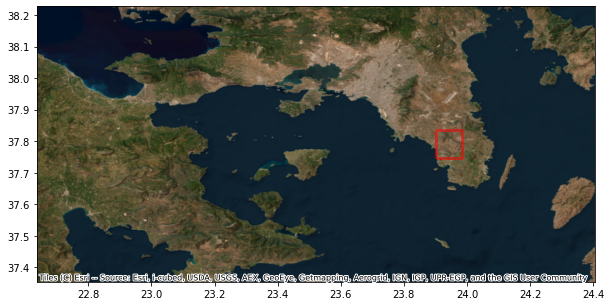

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 
aoi_gdf_.plot(ax=ax, edgecolor='red', facecolor='none', alpha=0, legend=True) #edgecolor for the lines, facecolor for the filling, alpha for transparency, hatch for the ribbed effect
aoi_gdf.plot(ax=ax, edgecolor='red', facecolor='none', alpha=0.50, linewidth=3, legend=True)
ctx.add_basemap(ax, crs=shapefile.crs.to_string(), source=ctx.providers.Esri.WorldImagery)
plt.savefig('/home/sg/Projects/fires2023/kalivia_37.80006_23.922329/map_aoi.png',dpi=300,bbox_inches='tight')

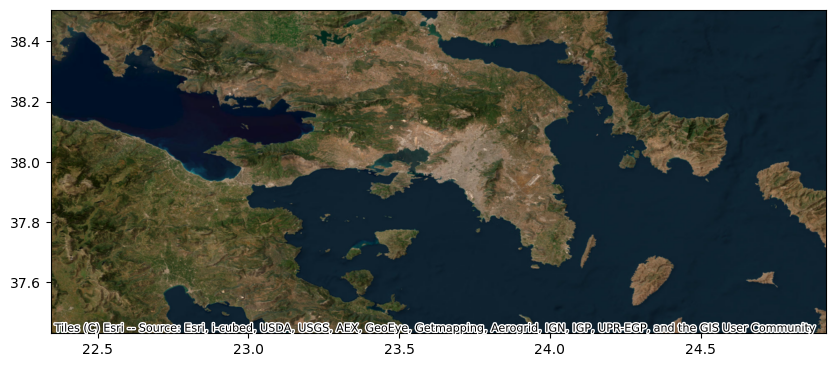

In [8]:
shapefile = gpd.read_file('C:\\Users\\User\\Documents\\Projects_2022\\FireHub_FireMapping_Summer\\FireHub_2023\\mandra_17072023\\attiki_intro.shp')
shapefile = shapefile.to_crs(epsg=4326) #reproject in WGS84
fig, ax = plt.subplots(figsize=(10,10)) 
shapefile.plot(ax=ax, edgecolor='red', facecolor='none', alpha=0, legend=True) #edgecolor for the lines, facecolor for the filling, alpha for transparency, hatch for the ribbed effect
ctx.add_basemap(ax, crs=shapefile.crs.to_string(), source=ctx.providers.Esri.WorldImagery)